In [1]:
#import the packages
import pandas as pd
import matplotlib.pyplot as myplot
import seaborn as sns
import statsmodels.api as mylgm

In [2]:
#import the data
mydata=pd.read_csv(r'C:\Users\SRINJOY\Downloads\Logistic_Reg.csv')

In [3]:
mydata.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
0,6.2,9.3,7.4,1
1,2.6,2.2,8.7,1
2,9.5,1.5,8.2,1
3,2.6,5.0,0.4,0
4,10.0,7.7,7.2,1


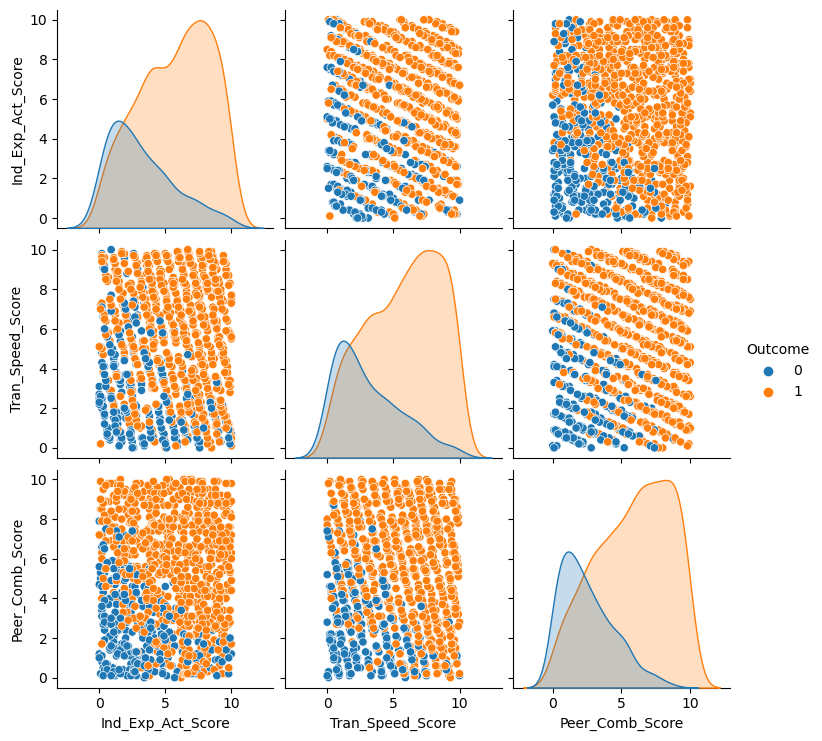

In [4]:
#prelim analysis
sns.pairplot(mydata,hue='Outcome')
myplot.show()

In [5]:
#seperate x and y
x=mydata.iloc[:,:3]
y=mydata.Outcome

In [6]:
#add intercept
x['Intercept']=1

In [7]:
#develop logistic model
mymodel=mylgm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.064710
         Iterations 12


In [8]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  980
Model:                          Logit   Df Residuals:                      976
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.8903
Time:                        11:40:03   Log-Likelihood:                -63.416
converged:                       True   LL-Null:                       -577.85
Covariance Type:            nonrobust   LLR p-value:                9.799e-223
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Ind_Exp_Act_Score     2.7957      0.355      7.867      0.000       2.099       3.492
Tran_Speed_Score      2.7532      0.343      8.032      0.000       2.081       3.425
Peer_Comb_Score       3.5153      0.434      8.095      0.000       2.664       4.366
Intercept           -35.5062      4.406     -8.058      0.000     -44.142     -26.870
=====================================================================================

Possibly complete quasi-separation: A fraction 0.62 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
#predicted values
ypred=mymodel.predict(x)
ypred

0      1.000000
1      0.999776
2      1.000000
3      0.000002
4      1.000000
         ...   
975    0.046811
976    1.000000
977    0.000404
978    0.000098
979    0.075612
Length: 980, dtype: float64

In [11]:
#predicted class
predclass=[1 if i>=0.5 else 0 for i in ypred]
predclass

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


In [12]:
#accuracy
mytable=pd.crosstab(y,predclass)
mytable

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [14]:
accuracy=100*(257+695)/(257+695+14+14)
round(accuracy,3)

97.143

In [15]:
##another approach using sklearn package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [22]:
mymodel_1=LogisticRegression(C=1e08).fit(x,y)

In [23]:
mymodel_1.intercept_

array([-17.75308332])

In [24]:
mymodel_1.coef_

array([[  2.79572675,   2.75315904,   3.51531496, -17.7530833 ]])

In [25]:
ypred_1=mymodel_1.predict(x)

In [26]:
predprob_1=mymodel_1.predict_proba(x)

In [27]:
predprob_1

array([[2.88657986e-15, 1.00000000e+00],
       [2.24162994e-04, 9.99775837e-01],
       [3.74296150e-11, 1.00000000e+00],
       ...,
       [9.99596347e-01, 4.03652882e-04],
       [9.99901849e-01, 9.81510998e-05],
       [9.24388153e-01, 7.56118471e-02]])

In [28]:
mytable_1=pd.crosstab(y,ypred_1)

In [29]:
mytable_1

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [31]:
accuracy_1=mymodel_1.score(x,y)
round(accuracy_1*100,3)

97.143

In [33]:
mycv=cross_val_score(mymodel_1,x,y,scoring='accuracy',cv=10)
#cross validation accuracy
cv_accuracy=mycv.mean()
round(cv_accuracy*100,3)

96.939